## __Detecting and Preventing: Overfitting and Underfitting__

## Step 1: Import Required Libraries

- Import the required libraries and functions
- Use an inbuilt data set from sklearn

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

import matplotlib.pyplot as plt

- Let's create the X and y variables
by using **make_classification**.

- Create a sample size of 9000 and a feature of 18 with n-information as 4, n-redundant as 12, and  random_state as 4.


In [ ]:
X, y = make_classification( n_samples =9000, n_features=18, n_informative=4, n_redundant= 12, random_state=2)

__Observation:__

- X and y variable are created.

## Step 2: Split the Dataset into Train and Test Datasets

- Let's split the data into 70 for training and 30 for testing.

 - Create an empty list for **train_scores** and **test_scores**.
 - Create the values. (Here, we are checking for 21 values.)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

In [ ]:
train_scores, test_scores = list(), list()

In [ ]:
values = [i for i in range(1,21)]

- Now, let’s create a for loop for the model and decision.

  - Pass the “i” values
  - Check how the model will perform at different depths
  - Fit the model and create a **train_yhat**
  - Predict the model for **X_train**
  - Set the accuracy score for the train
  - Do the same for the test data set
  - Append the values to the empty list
  - Print the output (keep it up to 3 decimal places)


In [ ]:
for i in values:
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    train_scores.append(train_acc)
    test_scores.append(test_acc)
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.664, test: 0.671
>2, train: 0.709, test: 0.700
>3, train: 0.795, test: 0.794
>4, train: 0.844, test: 0.838
>5, train: 0.872, test: 0.860
>6, train: 0.899, test: 0.885
>7, train: 0.915, test: 0.892
>8, train: 0.930, test: 0.896
>9, train: 0.942, test: 0.891
>10, train: 0.955, test: 0.899
>11, train: 0.965, test: 0.893
>12, train: 0.972, test: 0.886
>13, train: 0.979, test: 0.880
>14, train: 0.987, test: 0.879
>15, train: 0.991, test: 0.881
>16, train: 0.995, test: 0.876
>17, train: 0.997, test: 0.872
>18, train: 0.997, test: 0.880
>19, train: 0.998, test: 0.881
>20, train: 0.998, test: 0.878


__Observation:__

- We got the accuracy for various train and test data sets.

- Now, let's plot this. 

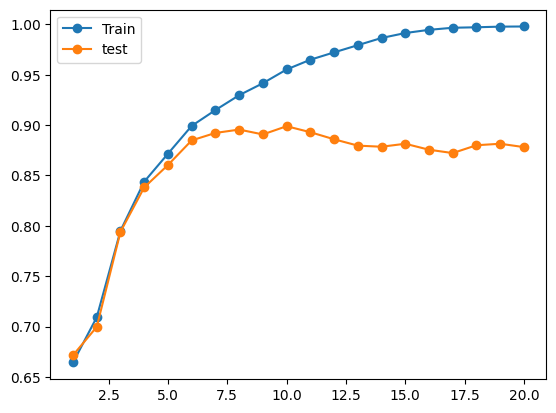

In [ ]:
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='test')
pyplot.legend()
pyplot.show()

__Observations:__

- Here, you can see that for one depth train, the low accuracy is around 84%
and the test is 82%.


- So, there is scope for improvement with low accuracy.


- Hence, this is referred to as underfitting.


- Whereas in the overfitting problem, you see the depth is 20.


- It is able to predict 100% on the training set, whereas in the test it is performing poorly, at 93.

## Step 3: Perform Hyperparameter Tuning with GridSearchCV

- Define the parameter grid for GridSearchCV
- Perform hyperparameter tuning using GridSearchCV
- Fit the model with the best parameters
- Evaluate the model on training and test sets


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
para_grid = {'criterion' :['gini', 'entropy'], 'max_depth':[2,4,6,10,20], 'min_samples_split':[5,10,20, 50, 100]}
clf= GridSearchCV(DecisionTreeClassifier(), para_grid, cv=3, n_jobs=-1, scoring="accuracy")
clf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 10, 20],
                         'min_samples_split': [5, 10, 20, 50, 100]},
             scoring='accuracy')

In [ ]:
clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5)

Observation:

- The best estimators are entropy, with a max_depth of ten and a min_samples_split of ten.

## Step 4: Compare the Test vs. Train Plot After Hyperparameter Tuning
- Observe the two bars representing the training and testing accuracy scores
-Compare the height of the __Train__ and __Test__ bars to assess the model's performance
- Look for significant differences in accuracy between the training and testing bars, indicating potential overfitting
- Evaluate whether the model has low accuracy scores for both training and testing, indicating underfitting
- Aim for a close match in accuracy between the training and testing bars for a well-performing and well-generalized model
- Use the plot to gain insights into the model's ability to generalize to unseen data after hyperparameter tuning

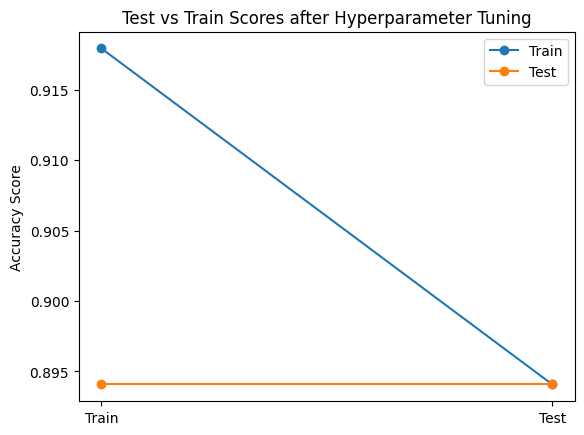

In [ ]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

# Plot the test vs train scores
values = np.arange(2)

plt.plot(values, [train_score, test_score], '-o', label='Train')
plt.plot(values, [test_score, test_score], '-o', label='Test')
plt.xticks(values, ['Train', 'Test'])
plt.ylabel('Accuracy Score')
plt.title('Test vs Train Scores after Hyperparameter Tuning')
plt.legend()
plt.show()


__Observation:__

- In the above output, we can observe the two bars representing the training and testing accuracy scores after hyperparameter tuning.

- Let's print the accuracy
for both test and train to work on the overfitting problem.


In [ ]:
print(accuracy_score(y_train, clf.best_estimator_.predict(X_train)))
print(accuracy_score(y_test, clf.best_estimator_.predict(X_test)))

0.9182539682539682
0.894074074074074


__Observations:__

- Previously, for sample set 10, it was 98%, and the difference was around 4%.
- However, the difference has now been reduced.
- We have to further fine-tune it to make the difference as close as possible.
- That is when we can claim that the overfitting problem has been resolved.
- For underfitting problems, we usually try out different models to increase the accuracy.

That's how we prevent underfitting and overfitting problems.